In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['embeddings', 'train.csv', 'sample_submission.csv', 'test.csv']


lets import few important libraries and packages

In [2]:
import seaborn as sns # for intractve graphs


In [3]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline


Reading our data using pandas

In [4]:
train_data = pd.read_csv("../input/train.csv", header=0)
test_data = pd.read_csv("../input/test.csv", header=0)


Lets describe the data 

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


We have 1306122 rows of data and lets see if we have any missing values

In [6]:
train_data.isnull().sum()

qid              0
question_text    0
target           0
dtype: int64

Good!! we don't have any missing values, don't have to handle them now. Moving further lets see if have class unbalance problem

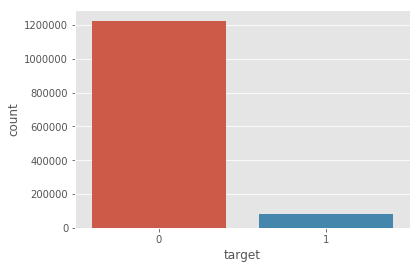

In [7]:
sns.countplot("target",data=train_data)


Ohh my gosh!! we have class imbalance problem, need to balance it otherwise we will get skewed results.

In [8]:
# now let us check in the number of Percentage
Count_Normal_transacation = len(train_data[train_data["target"]==0]) # normal transaction are repersented by 0
Count_insincere_transacation = len(train_data[train_data["target"]==1]) # fraud by 1
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_insincere_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_insincere_transacation= Count_insincere_transacation/(Count_Normal_transacation+Count_insincere_transacation)
print("percentage of fraud transacation",Percentage_of_insincere_transacation*100)

percentage of normal transacation is 93.81298224821265
percentage of fraud transacation 6.187017751787352


Now handling the class imbalance problem, we are using a function to tackle this, so just to save some processing time we would be taking an assumption that the training data is class=1 is equal to class=0, means we take equal number of data of both clases.

In [9]:
insincere_indices= np.array(train_data[train_data.target==1].index)
normal_indices = np.array(train_data[train_data.target==0].index)
#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data
def undersample(normal_indices,insincere_indices,times):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_insincere_transacation),replace=False))
    print(len(Normal_indices_undersample))
    undersample_data= np.concatenate([insincere_indices,Normal_indices_undersample])

    undersample_data = train_data.iloc[undersample_data,:]
    #print(undersample_data)
    print(len(undersample_data))

    print("the normal transacation proportion is :",len(undersample_data[undersample_data.target==0])/len(undersample_data))
    print("the fraud transacation proportion is :",len(undersample_data[undersample_data.target==1])/len(undersample_data))
    print("total number of record in resampled data is:",len(undersample_data))
    return(undersample_data)


You can handle change the last parameter of the function for changing the proportion of the classes, as of now I have taken equal proportion.

In [10]:
Undersample_data = undersample(normal_indices,insincere_indices,1)

80810
161620
the normal transacation proportion is : 0.5
the fraud transacation proportion is : 0.5
total number of record in resampled data is: 161620


In [11]:
questions=Undersample_data.iloc[:,1].values.tolist()
labels=Undersample_data.iloc[:,2].values.tolist()

**Now we can proceed with handing NLP and Embeddings.**